# Análise do Preço do Brent Oil de 1988 - 2021
Uma análise com a Série Temporal do Brent Oil.

In [1]:
# Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/content/BrentOilPrices.csv")
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


## Análise Exploratório dos Dados

In [14]:
# Verificando Informações do dataset
df.info

<bound method DataFrame.info of               Date  Price
0        20-May-87  18.63
1        21-May-87  18.45
2        22-May-87  18.55
3        25-May-87  18.60
4        26-May-87  18.63
...            ...    ...
8549  Jan 19, 2021  55.38
8550  Jan 20, 2021  55.66
8551  Jan 21, 2021  55.68
8552  Jan 22, 2021  55.22
8553  Jan 25, 2021  55.44

[8554 rows x 2 columns]>

In [15]:
# Verificando os primeiros dados
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [16]:
# Verficando os últimos dados
df.tail()

,Date,Price
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22
8553,"Jan 25, 2021",55.44


### Diferença nas coluna Date
Pode-se perceber a diferença no formato da data na coluna Date, entre os primeiros dados no dataset e os últimos. Para definir um padrão destes dados e ser possível uma análise com Série Temporal (Time Series), iremos utilizar a função da biblioteca pandas, **pd.to_datetime()** que converte a coluna em um formato tanto o seu tipo como o formato mesmo do dados disponível, em um formato padrão para Data e Hora que se utiliza em Séries Temporais.

Mas antes desta transformação, veremos se há valores ausentes (nulos) e se há valores duplicados, também será utilizada funções da biblioteca pandas, como **isna()** com **sum()**, ou seja, **isna().sum()** irá verificar os valores ausentes e retornar a soma deste valores em cada coluna existente no dataset.
E o **duplicated()** com o **sum()**, ou seja, **duplicated().sum()** irá verificar e retornar a soma dos valores duplicados em cada coluna do dataset.

In [17]:
# Verificando valores ausentes
df.isna().sum()

Date     0
Price    0
dtype: int64

In [18]:
# Verificando valores duplicados
df.duplicated().sum()

0

### Agora sim, vamos padronizar a coluna Date

In [19]:
# Vemos que precisa-se modificar a coluna Date para o formato correto Ano-Mes-Dia
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [20]:
# Verificar se nenhum dado foi perdido
df.isna().sum()

Date     0
Price    0
dtype: int64

In [21]:
# Verificar se nenhum dado foi duplicado
df.duplicated().sum()

0

In [29]:
# Adicionando coluna só com o ano e só com o mês
df['Ano']  = df['Date'].dt.strftime('%Y')
df['Mes'] = df['Date'].dt.strftime('%m')

In [30]:
# Verificando os primeiros dados
df.head()

,Date,Price,Ano,Mes
0,1987-05-20,18.63,1987,05
1,1987-05-21,18.45,1987,05
2,1987-05-22,18.55,1987,05
3,1987-05-25,18.60,1987,05
4,1987-05-26,18.63,1987,05


In [31]:
# Verificando os últimos dados
df.tail()

,Date,Price,Ano,Mes
8549,2021-01-19,55.38,2021,01
8550,2021-01-20,55.66,2021,01
8551,2021-01-21,55.68,2021,01
8552,2021-01-22,55.22,2021,01
8553,2021-01-25,55.44,2021,01


In [50]:
# Verificando a distribuição do preço
df.Price.describe()

count    8554.000000
mean       46.352962
std        32.165282
min         9.100000
25%        18.850000
50%        33.240000
75%        66.210000
max       143.950000
Name: Price, dtype: float64

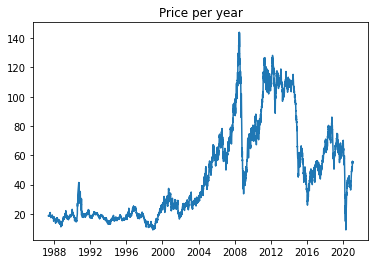

In [51]:
# Criando gráfico para visualizar a distribuição de preços por ano
# Criando gráfico de linhas
plt.plot(df["Date"], df["Price"])
# Título
plt.title("Price per year")
# Visualizando
plt.show()

In [48]:
df.value_counts().sum()

8554

In [91]:
ano_1990 = df[df["Ano"] == "1990"]
ano_1990.head()

,Date,Price,Ano,Mes
669,1990-01-02,21.20,1990,01
670,1990-01-03,22.65,1990,01
671,1990-01-04,22.50,1990,01
672,1990-01-05,23.13,1990,01
673,1990-01-08,21.38,1990,01


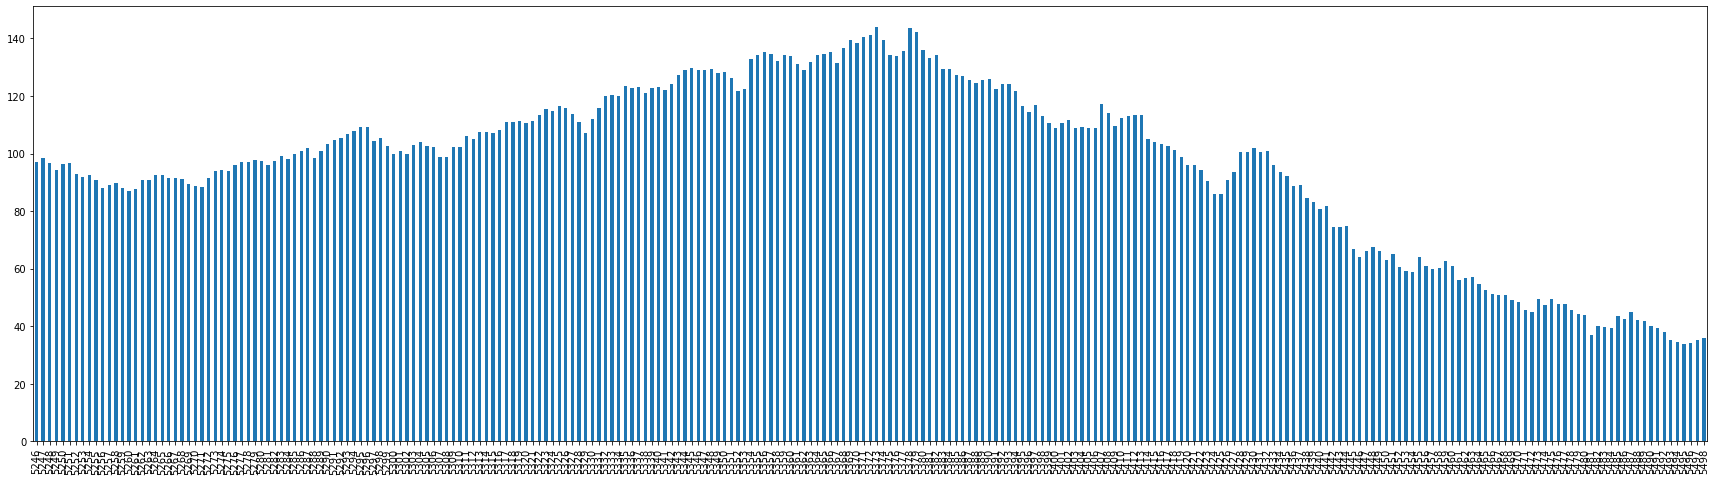

In [100]:
# Criando gráfico de linhas
df[df["Ano"] == "2008"]["Price"].plot(kind='bar', figsize=(30,8))

In [101]:
ano_2008 = df[df["Ano"] == "2008"]
ano_2008.describe()

,Price
count,253.000000
mean,96.944348
std,28.896931
min,33.730000
25%,87.060000
50%,100.950000
75%,117.240000
max,143.950000
